In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import random as random
import numpy as np
import csv

C:\Users\11004076\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\11004076\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\11004076\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\11004076\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\11004076\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\11004076\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File

In [2]:
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]

In [5]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1) #weight
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

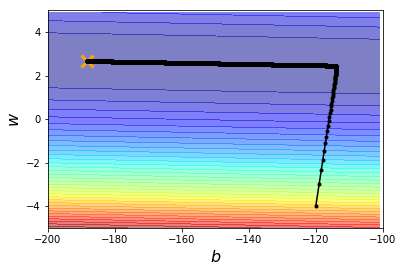

In [6]:
# ydata = b + w * xdata 
b = -120 # initial b
w = -4 # initial w
lr = 1 # learning rate
iteration = 100000

b_lr = 0.0
w_lr = 0.0

# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    
    # Update parameters.
    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

In [10]:
b_history

[-120,
 -119.0,
 -118.35544204123374,
 -117.86214074769242,
 -117.45811840393374,
 -117.11499860796559,
 -116.81699591031618,
 -116.55424345338845,
 -116.32007092214694,
 -116.109706065771,
 -115.9195844662268,
 -115.74695214002433,
 -115.5896222329777,
 -115.4458185993908,
 -115.3140711556735,
 -115.19314351620139,
 -115.08198153309054,
 -114.97967581220308,
 -114.88543383340514,
 -114.79855882933114,
 -114.71843351982366,
 -114.64450739931812,
 -114.57628666650399,
 -114.51332614777587,
 -114.45522274500149,
 -114.40161006266956,
 -114.35215395758748,
 -114.30654881759116,
 -114.26451442182608,
 -114.2257932691548,
 -114.19014828660507,
 -114.1573608488841,
 -114.12722905452576,
 -114.09956621539438,
 -114.07419952489911,
 -114.0509688769952,
 -114.0297258133204,
 -114.01033257997527,
 -113.9926612787575,
 -113.97659310029562,
 -113.962017628641,
 -113.94883220858117,
 -113.93694136831861,
 -113.92625629128294,
 -113.91669433176448,
 -113.9081785698132,
 -113.90063740147208,
 -113.89

In [8]:
w_history

[-4,
 -3.0,
 -2.3545433579600106,
 -1.8599482552683668,
 -1.4543588235751272,
 -1.1094484417273536,
 -0.809457796570896,
 -0.5445361046062548,
 -0.30802414946088935,
 -0.09515807805724077,
 0.09761968517928657,
 0.27305720956045126,
 0.4333359998422024,
 0.5802271981693785,
 0.715196096033522,
 0.8394744157121526,
 0.9541117206718573,
 1.0600128712057522,
 1.157965890065271,
 1.2486630790939441,
 1.3327172864839107,
 1.410674625155672,
 1.4830245513497133,
 1.5502079507844388,
 1.6126237010370035,
 1.6706340544983647,
 1.7245690983169908,
 1.7747304845826137,
 1.821394578002749,
 1.8648151344039006,
 1.9052255980886459,
 1.9428410870118211,
 1.9778601202317072,
 2.0104661309586653,
 2.0408287999113135,
 2.069105236979283,
 2.0954410339265683,
 2.1199712067127736,
 2.1428210427083827,
 2.1641068654437174,
 2.183936727414341,
 2.2024110397571213,
 2.2196231462252367,
 2.2356598477605503,
 2.2506018830361407,
 2.264524369579633,
 2.277497209457338,
 2.2895854629746872,
 2.300849693409962,